In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

data = pd.read_csv('master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [2]:
#Shape of dataframe

print("shape of` data: ", data.shape)
print("\ncolumns of data: ", data.columns)

shape of` data:  (31756, 12)

columns of data:  Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [2]:
#Renaming the columns names for convinience

data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicides/100k', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         31756 non-null  object 
 1   year            31756 non-null  int64  
 2   gender          31756 non-null  object 
 3   age_group       31756 non-null  object 
 4   suicide_count   30556 non-null  float64
 5   population      31756 non-null  int64  
 6   suicides/100k   31756 non-null  float64
 7   country-year    31756 non-null  object 
 8   HDI for year    12300 non-null  float64
 9   gdp_for_year    31756 non-null  object 
 10  gdp_per_capita  31756 non-null  float64
 11  generation      31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [4]:
data.age_group.value_counts()

age_group
15-24 years    5298
35-54 years    5298
75+ years      5298
25-34 years    5298
55-74 years    5298
5-14 years     5266
Name: count, dtype: int64

In [5]:
data.generation.value_counts()

generation
Generation X       7720
Silent             7020
Millenials         5844
Boomers            5646
G.I. Generation    4056
Generation Z       1470
Name: count, dtype: int64

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'suicide_count'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'suicides/100k'}>],
       [<Axes: title={'center': 'HDI for year'}>,
        <Axes: title={'center': 'gdp_per_capita'}>]], dtype=object)

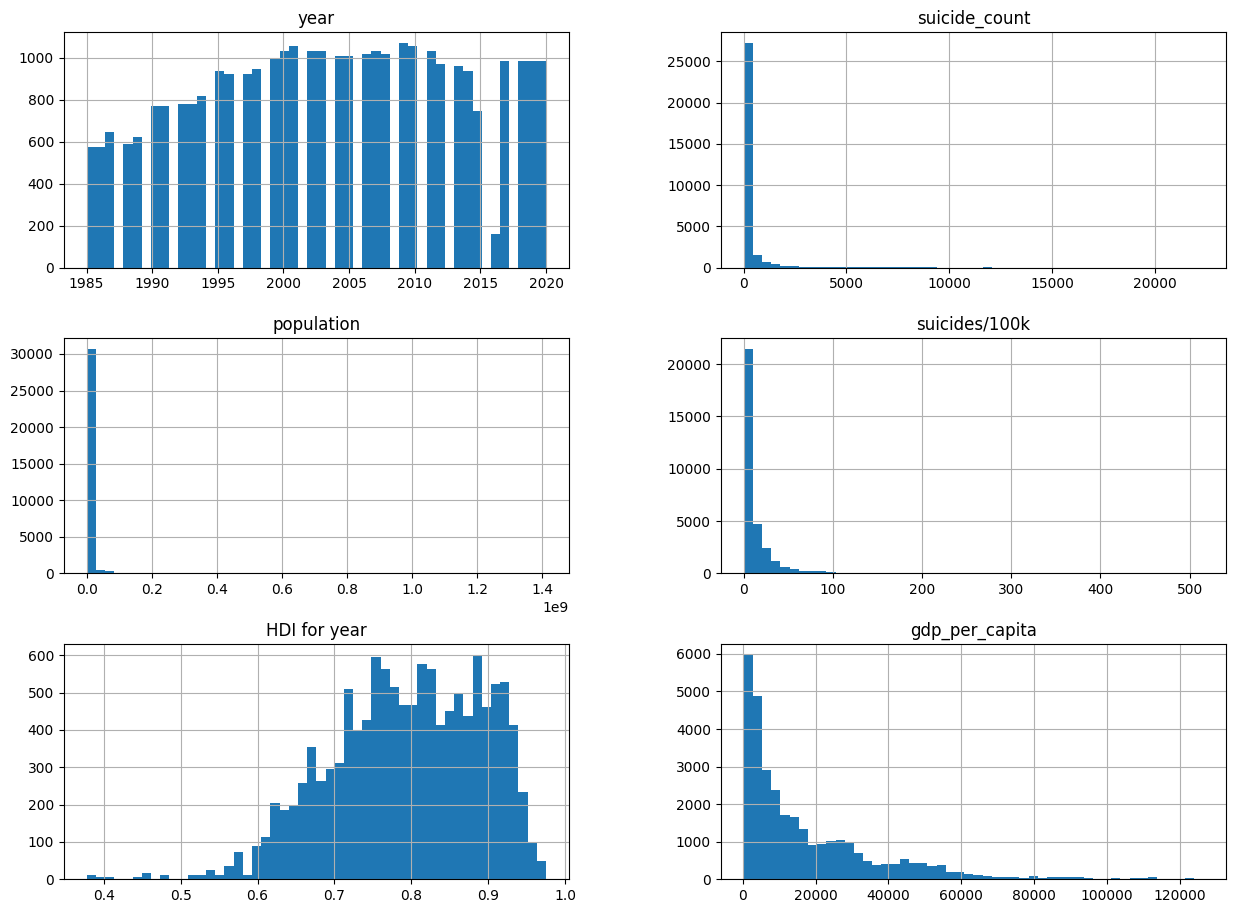

In [6]:
data.hist(bins=50, figsize=(15,11))

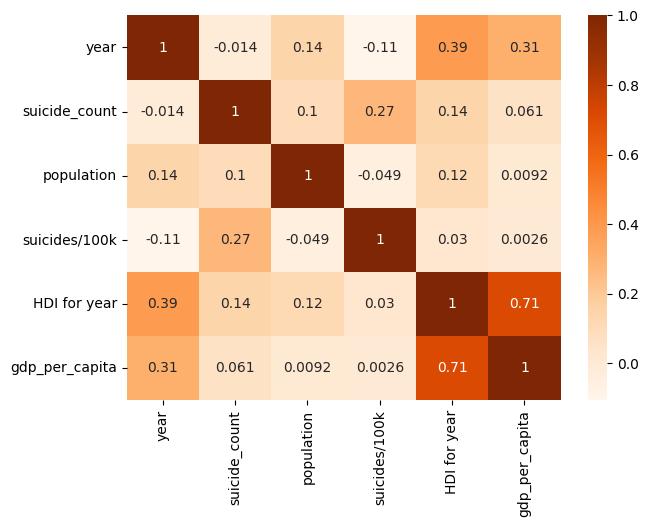

In [7]:
#Correlation heatmap
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')
plt.figure(figsize=(7,5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Oranges')
plt.show()

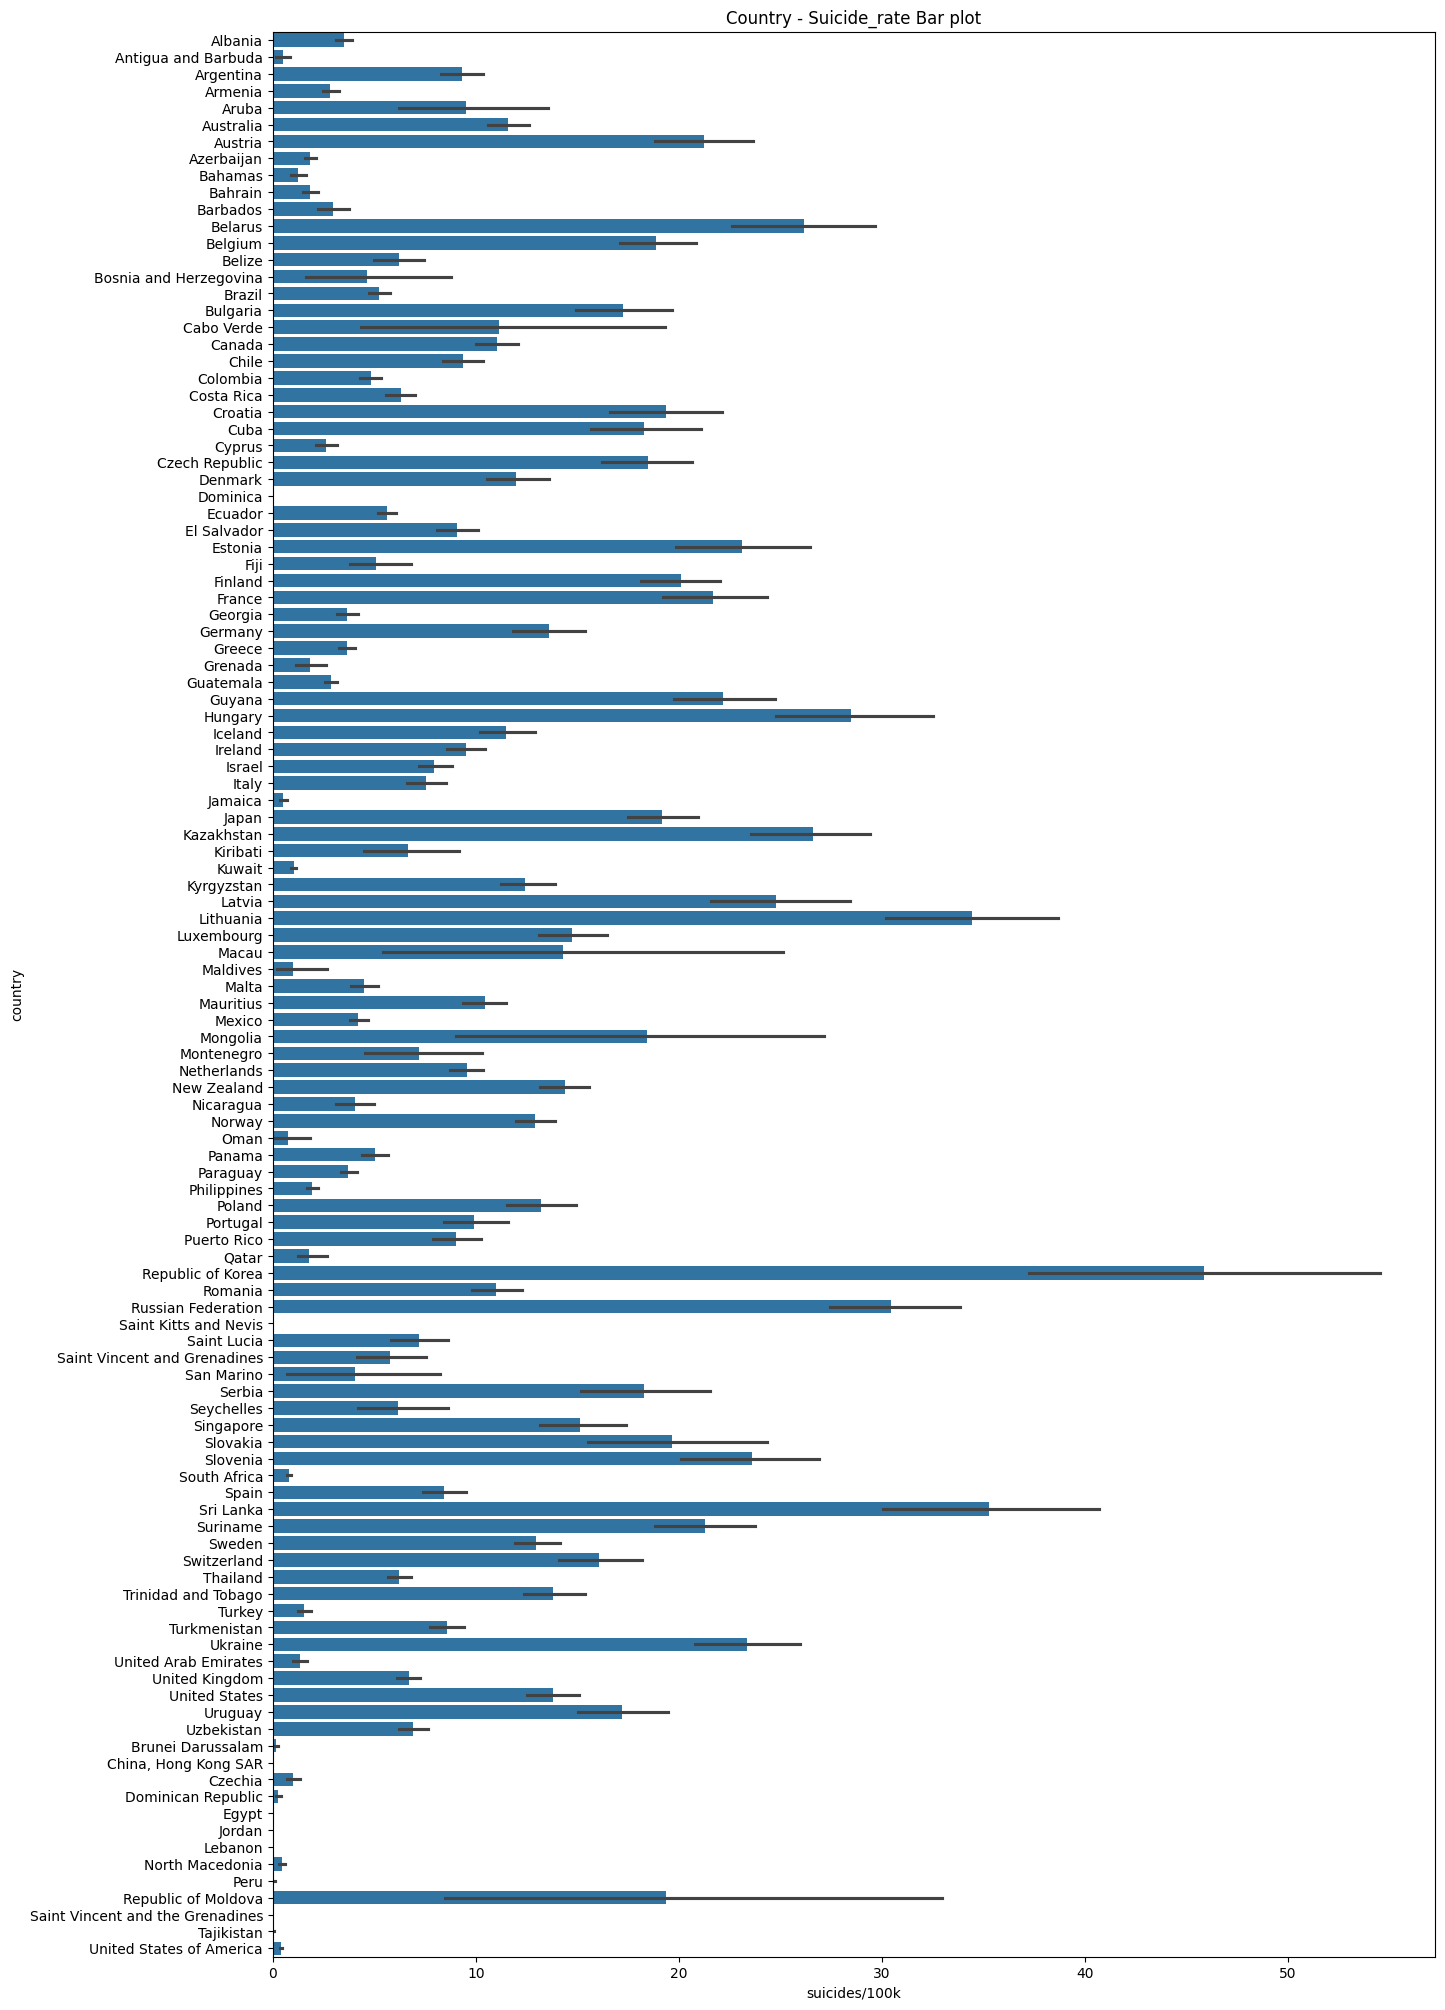

In [8]:
#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "suicides/100k", y = "country", data = data)
plt.title('Country - Suicide_rate Bar plot')
plt.show()

<Axes: xlabel='year'>

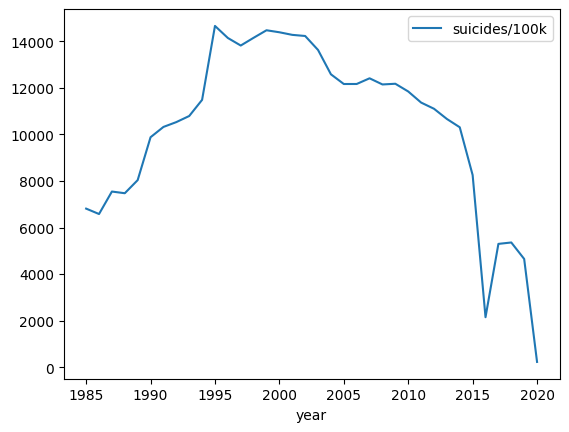

In [9]:
#Line plpot of year and suicide_rate

data[['year','suicides/100k']].groupby(['year']).sum().plot()

<Figure size 2000x1000 with 0 Axes>

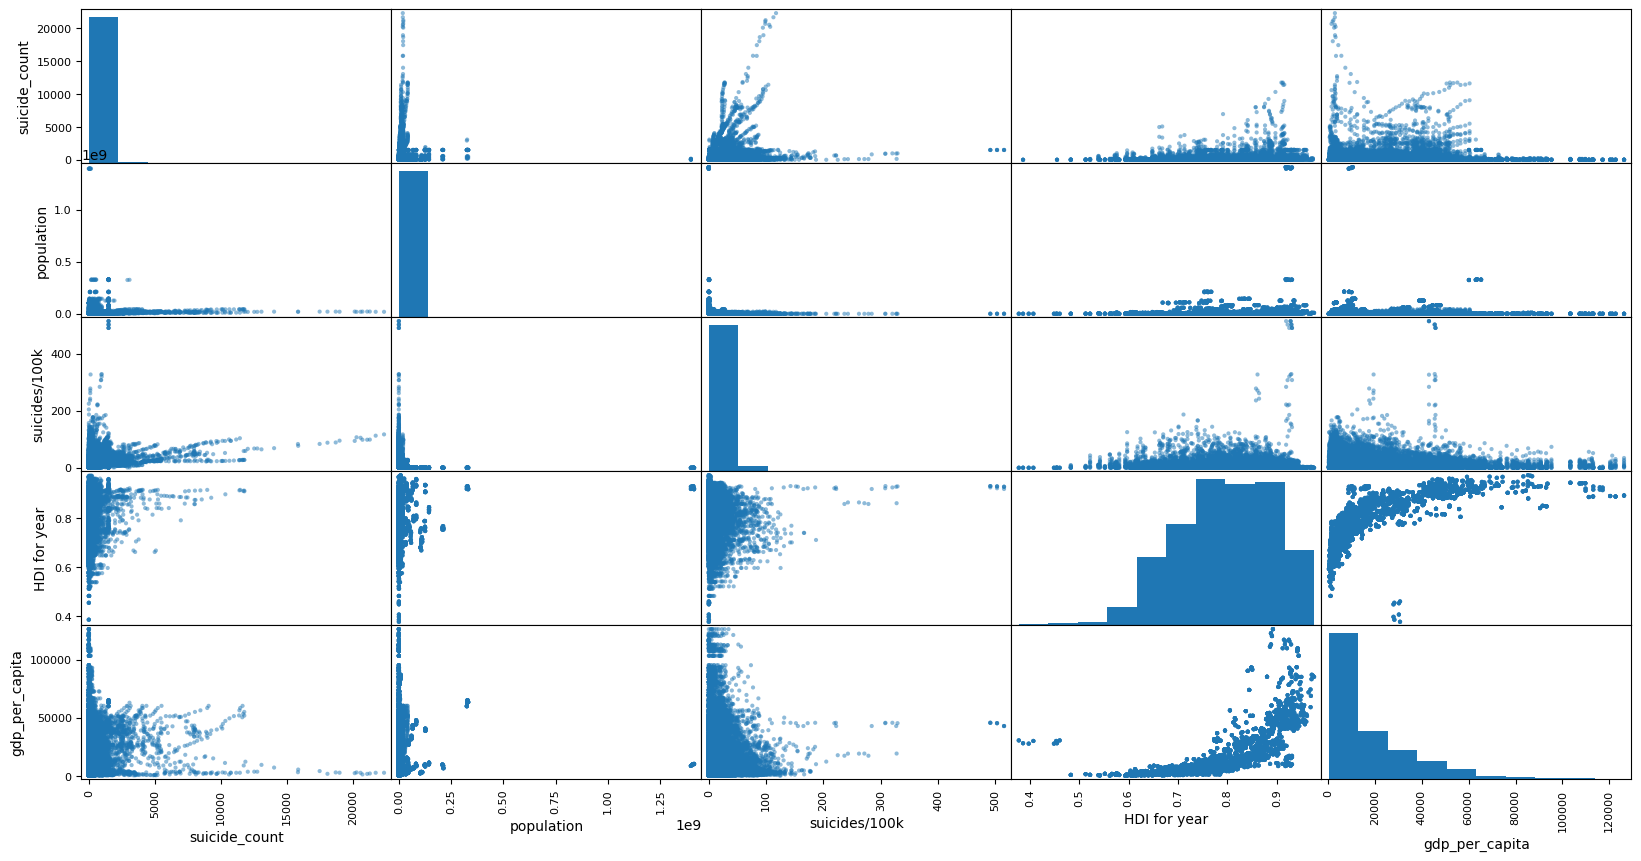

In [10]:
#Scatter matrix for checking outlier

plt.figure(figsize=(20,10))
attributes = ['suicide_count', 'population', 'suicides/100k','HDI for year', 
              'gdp_for_year','gdp_per_capita']
scatter_matrix(data[attributes], figsize=(20,10))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

data = data.drop(['HDI for year', 'country-year'], axis = 1)
data = data.dropna()

# Encode 'gender'
le_sex = LabelEncoder()
data['gender_enc'] = le_sex.fit_transform(data['gender'])

# Encode 'age' as ordinal
age_order = ["5-14 years", "15-24 years", "25-34 years", 
             "35-54 years", "55-74 years", "75+ years"]
ord_age = OrdinalEncoder(categories=[age_order])
data['age_enc'] = ord_age.fit_transform(data[['age_group']]).astype(int)

# One-hot encode 'generation'
data = pd.get_dummies(data, columns=['generation'], prefix='gen')
gen_cols = [col for col in data.columns if col.startswith('gen_')]
data[gen_cols] = data[gen_cols].astype(int)

# Converting the column 'gdp_for_year' to float from object
data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)

data = data.drop(['gender', 'age_group'], axis=1)

##################################################################################

from sklearn.model_selection import train_test_split, KFold
import category_encoders as ce

# Define features and target
y = data['suicides/100k']
X = data.drop(columns=['suicides/100k', 'suicide_count', 'population'])

#split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# ---------------------- Target Encoding with K-Fold CV ----------------------

# (a) Create an empty Series to collect fold-wise encodings
country_te_train = pd.Series(index=X_train.index, dtype=float)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for tr_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
    y_tr = y_train.iloc[tr_idx]
    
    te_fold = ce.TargetEncoder(cols=['country'])
    te_fold.fit(X_tr[['country']], y_tr)
    
    country_te_train.iloc[val_idx] = (
        te_fold.transform(X_val[['country']])['country']
    ).values

# (b) Fit a final encoder on *all* training data, for the test set
final_te = ce.TargetEncoder(cols=['country'])
final_te.fit(X_train[['country']], y_train)
country_te_test = final_te.transform(X_test[['country']])['country'].values

# (c) Drop the raw 'country' feature and insert the encoded versions
X_train_enc = X_train.drop(columns=['country']).copy()
X_train_enc['country_te'] = country_te_train

X_test_enc = X_test.drop(columns=['country']).copy()
X_test_enc['country_te'] = country_te_test

############################################################################
# --- Scale numeric features with RobustScaler -------------------------------
from sklearn.preprocessing import RobustScaler

# Identify numeric cols (all except the one‐hot gen_ columns and encodings are numeric)
num_cols = [
    'gdp_for_year', 'gdp_per_capita','country_te'
]

scaler = RobustScaler()
X_train_enc[num_cols] = scaler.fit_transform(X_train_enc[num_cols])
X_test_enc[num_cols]  = scaler.transform(X_test_enc[num_cols])


# --- Now X_train_enc, X_test_enc, y_train, y_test are ready for modeling! --------

print("Train shape:", X_train_enc.shape)
print("Test shape: ", X_test_enc.shape)
#############################################################################


Train shape: (24444, 13)
Test shape:  (6112, 13)



=== Cross-validating KNN ===
Training fold 1/10 for KNN...
Fold 1 - MAE: 5.8986, MSE: 133.7340, RMSE: 11.5643
Training fold 2/10 for KNN...
Fold 2 - MAE: 5.4848, MSE: 110.9309, RMSE: 10.5324
Training fold 3/10 for KNN...
Fold 3 - MAE: 5.7027, MSE: 120.5726, RMSE: 10.9806
Training fold 4/10 for KNN...
Fold 4 - MAE: 5.6837, MSE: 126.6468, RMSE: 11.2537
Training fold 5/10 for KNN...
Fold 5 - MAE: 5.5796, MSE: 120.7347, RMSE: 10.9879
Training fold 6/10 for KNN...
Fold 6 - MAE: 6.3015, MSE: 219.8257, RMSE: 14.8265
Training fold 7/10 for KNN...
Fold 7 - MAE: 6.0363, MSE: 195.0967, RMSE: 13.9677
Training fold 8/10 for KNN...
Fold 8 - MAE: 5.5486, MSE: 124.9606, RMSE: 11.1786
Training fold 9/10 for KNN...
Fold 9 - MAE: 5.7612, MSE: 139.1009, RMSE: 11.7941
Training fold 10/10 for KNN...
Fold 10 - MAE: 5.6084, MSE: 117.1640, RMSE: 10.8242
KNN - 10-fold CV Mean MAE: 5.7606, Mean MSE: 140.8767, Mean RMSE: 11.7910


=== Cross-validating Random Forest ===
Training fold 1/10 for Random Forest...
Fol

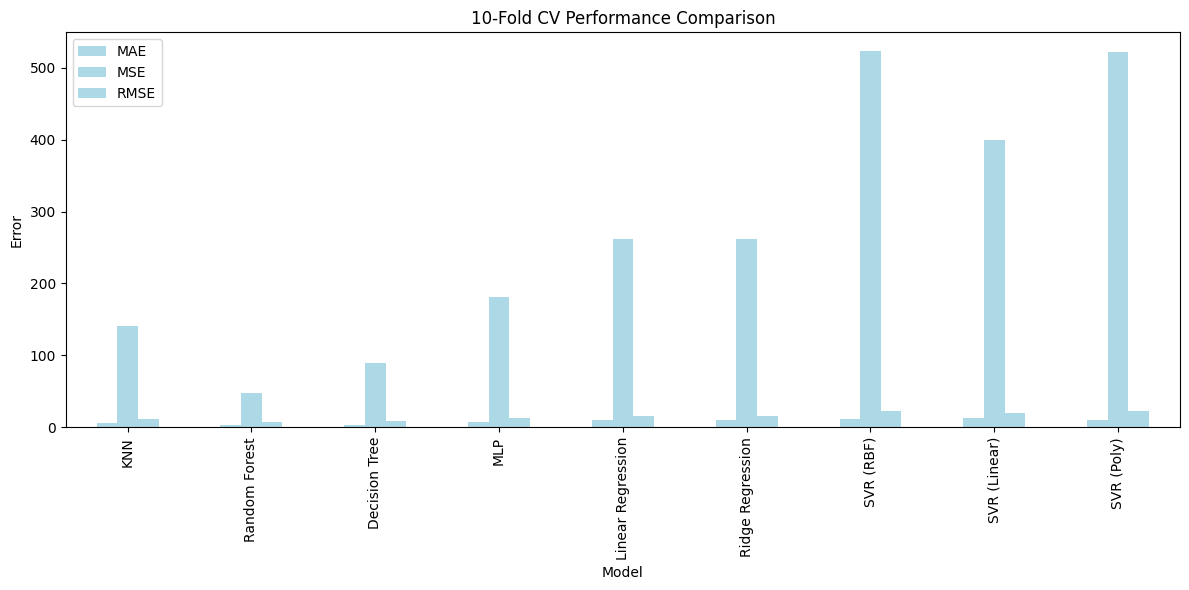

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR


# Define your models
models = {
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'MLP': MLPRegressor(random_state=42, max_iter=500),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'SVR (RBF)': SVR(kernel='rbf'),
    'SVR (Linear)': SVR(kernel='linear'),
    'SVR (Poly)': SVR(kernel='poly', degree=3)
}

# 10-Fold cross-validation on the training set
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = []

for name, model in models.items():
    print(f"\n=== Cross-validating {name} ===")
    fold_maes = []
    fold_mses = []
    fold_rmses = []
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_enc), 1):
        print(f"Training fold {fold}/10 for {name}...")
        X_tr, X_val = X_train_enc.iloc[train_idx], X_train_enc.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        
        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        fold_maes.append(mae)
        fold_mses.append(mse)
        fold_rmses.append(rmse)
        print(f"Fold {fold} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    
    cv_results.append({
        'Model': name,
        'MAE': np.mean(fold_maes),
        'MSE': np.mean(fold_mses),
        'RMSE': np.mean(fold_rmses)
    })
    print(f"{name} - 10-fold CV Mean MAE: {np.mean(fold_maes):.4f}, "
          f"Mean MSE: {np.mean(fold_mses):.4f}, Mean RMSE: {np.mean(fold_rmses):.4f}\n")

# Summarize CV results
df_cv = pd.DataFrame(cv_results).set_index('Model')
print("=== 10-Fold CV Results ===")
print(df_cv)

# Plot CV performance
ax = df_cv.plot(kind='bar', figsize=(12, 6), color='lightblue')
ax.set_title('10-Fold CV Performance Comparison')
ax.set_ylabel('Error')
plt.tight_layout()
plt.show()

In [9]:

# -----------------------------------------------------------------------------
# TEST SET EVALUATION
# -----------------------------------------------------------------------------

test_results = []
for name, model in models.items():
    print(f"\n=== Training {name} on full training set and evaluating on test set ===")
    model.fit(X_train_enc, y_train)
    y_pred_test = model.predict(X_test_enc)
    
    mae_test  = mean_absolute_error(y_test, y_pred_test)
    mse_test  = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    
    test_results.append({
        'Model': name,
        'Test MAE': mae_test,
        'Test MSE': mse_test,
        'Test RMSE': rmse_test
    })
    print(f"{name} - Test MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}")

# Summarize Test results
df_test = pd.DataFrame(test_results).set_index('Model')
print("\n=== Test Set Results ===")
print(df_test)

# Merge CV and Test results for comparison
df_combined = df_cv.join(df_test)
print("\n=== CV vs Test Comparison ===")
print(df_combined)

# visualize comparison side by side
# df_combined.plot(kind='bar', figsize=(14, 7), color=['lightblue', 'salmon'])
# plt.title('CV vs Test Error Comparison')
# plt.tight_layout()
# plt.show()



=== Training KNN on full training set and evaluating on test set ===
KNN - Test MAE: 5.9140, MSE: 184.5405, RMSE: 13.5846

=== Training Random Forest on full training set and evaluating on test set ===
Random Forest - Test MAE: 2.4729, MSE: 41.8380, RMSE: 6.4682

=== Training Decision Tree on full training set and evaluating on test set ===
Decision Tree - Test MAE: 3.0116, MSE: 59.5389, RMSE: 7.7161

=== Training MLP on full training set and evaluating on test set ===
MLP - Test MAE: 6.8807, MSE: 177.7285, RMSE: 13.3315

=== Training Linear Regression on full training set and evaluating on test set ===
Linear Regression - Test MAE: 9.3345, MSE: 267.5978, RMSE: 16.3584

=== Training Ridge Regression on full training set and evaluating on test set ===
Ridge Regression - Test MAE: 9.3341, MSE: 267.5935, RMSE: 16.3583

=== Training SVR (RBF) on full training set and evaluating on test set ===
SVR (RBF) - Test MAE: 10.8924, MSE: 571.6291, RMSE: 23.9088

=== Training SVR (Linear) on full t